## Business Objective/Problem
Công ty X chủ yếu bán các sản phẩm là quà tặng dành cho những dịp đặc biệt. Nhiều khách hàng của công ty là khách hàng bán buôn.
Công ty X mong muốn có thể bán được nhiều sản phẩm hơn cũng như giới thiệu sản phẩm đến đúng đối tượng khách hàng, chăm sóc và làm hài lòng khách hàng.

## Triển khai dự án

### Bước 1: Business Understanding
-Công ty muốn tìm ra giải pháp giúp cải thiện hiệu quả quảng bá, từ đó giúp tăng doanh thu bán hàng, cải thiện mức độ hài lòng của khách hàng.  
-Mục tiêu/vấn đề: xây dựng hệ thống phân cụm khách hàng dựa trên các thông tin do công ty cung cấp, từ đó có thể giúp công ty xác định các nhóm khách hàng khác nhau để có chiến lược kinh doanh, chăm sóc khách hàng phù hợp.

### Bước 2: Data Understanding
Từ mục tiêu/vấn đề xác định, ta xem xét các dữ liệu cần thiết mà công ty đang có:  
-Toàn bộ dữ liệu được lưu trữ trong tập tin OnlineRetail.csv với 541.909 records chứa tất cả các giao dịch xảy ra từ ngày 01/12/2010 đến ngày 09/12/2011 đối với bán lẻ trực tuyến.  
-Mô tả dữ liệu: https://archive.ics.uci.edu/ml/datasets/online+retail

### Bước 3: Data Preparation

In [1]:
#!pip install pandas-profiling==2.7.1

In [2]:
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)

In [3]:
#%cd '/content/gdrive/MyDrive/LDS0_k271_HuynhKimTho/Project_2'

In [22]:
#Nhập các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
matplotlib.matplotlib_fname()

import plotly.express as px
import squarify

import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

from math import sqrt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy
import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch




from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from datetime import datetime


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.cluster import KMeans



Populating the interactive namespace from numpy and matplotlib


## 3. Tìm hiểu khám phá dữ liệu EDA và tiền xử lý dữ liệu

In [5]:
#Đọc dữ liệu
data = pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')

In [6]:
#Xem thông tin tổng quát
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55    17850.00  United Kingdom  
1  01-12-2010 08:26       3.39    17850.00  United Kingdom  
2  01-12-2010 08:26       2.75    17850.00  United Kingdom  
3  01-12-2010 08:26       3.39    17850.00  United Kingdom  
4  01-12-2010 08:26       3.39    17850.00  United Kingdom

### 3.1 Khám phá tổng thể các thuộc tính của dữ liệu

In [9]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Nhận xét:  
- Từ Pandas Profiling, ta thấy dữ liệu có missing values ở cột ‘Description’ và ‘CustomerID’  
- Có tổng cộng 135080 dòng có missing values ở cột 'CustomerID'
- Có tổng cộng 1454 dòng có missing values ở cột 'Description'
- Dữ liệu có 4837 dòng bị trùng, ta cần phải xóa đi.
- ‘CustomerID’ có mối quan hệ mạnh với ‘Country’  


In [9]:
#Xóa đi các dòng bị trùng
print('Trước khi dropping:', data.shape[0])
data = data.drop_duplicates().reset_index()
data = data.drop('index', axis=1)
print('Sau khi dropping:', data.shape[0])
data.info()

Trước khi dropping: 541909
Sau khi dropping: 536641
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [10]:
#Kiểm tra lại xem dữ liệu có null hay không và xử lý các dữ liệu null đó
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [11]:
data.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [12]:
#Xem sơ lược qua các dòng có dữ liệu missing từ cột 'Description'
data[data['Description'].isnull()].head()

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
605     536414     22139         NaN        56  01-12-2010 11:52       0.00   
1934    536545     21134         NaN         1  01-12-2010 14:32       0.00   
1935    536546     22145         NaN         1  01-12-2010 14:33       0.00   
1936    536547     37509         NaN         1  01-12-2010 14:33       0.00   
1951    536549    85226A         NaN         1  01-12-2010 14:34       0.00   

      CustomerID         Country  
605          nan  United Kingdom  
1934         nan  United Kingdom  
1935         nan  United Kingdom  
1936         nan  United Kingdom  
1951         nan  United Kingdom

In [13]:
#Xem sơ lược qua các dòng có dữ liệu missing từ cột 'CustomerID'
data[data['CustomerID'].isna()].head()

InvoiceNo StockCode                      Description  Quantity  \
605     536414     22139                              NaN        56   
1407    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1408    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1409    536544     21786               POLKADOT RAIN HAT          4   
1410    536544     21787            RAIN PONCHO RETROSPOT         2   

           InvoiceDate  UnitPrice  CustomerID         Country  
605   01-12-2010 11:52       0.00         nan  United Kingdom  
1407  01-12-2010 14:32       2.51         nan  United Kingdom  
1408  01-12-2010 14:32       2.51         nan  United Kingdom  
1409  01-12-2010 14:32       0.85         nan  United Kingdom  
1410  01-12-2010 14:32       1.66         nan  United Kingdom

#### Nhận xét:
Hiện tại, ta đang xây dựng model phân cụm khách hàng cho bài toán, và cột 'CustomerID' có số lượng dòng chứa missing values > 135000, không có ý nghĩa cho việc phân cụm cho nên ta sẽ loại bỏ ra khỏi dữ liệu. 

In [15]:
#Trích xuất bộ liệu để xây dựng model sau khi đã lọc bỏ các missing values trong cột 'CustomerID'
input_data = data[~data['CustomerID'].isnull()].reset_index()
input_data = input_data.drop('index', axis=1)
input_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55    17850.00  United Kingdom  
1  01-12-2010 08:26       3.39    17850.00  United Kingdom  
2  01-12-2010 08:26       2.75    17850.00  United Kingdom  
3  01-12-2010 08:26       3.39    17850.00  United Kingdom  
4  01-12-2010 08:26       3.39    17850.00  United Kingdom

In [16]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.5+ MB


In [17]:
#Copy thành 1 tập dữ liệu khác, không đụng vào bộ dữ liệu gốc đầu vào
df = input_data.copy(deep=True)

In [18]:
#Xử lý kiểu dữ liệu cho các cột 'CustomerID' và 'InvoiceDate'
df['CustomerID'] = df['CustomerID'].astype('int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.5+ MB


In [19]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-01-12 08:26:00       2.55       17850  United Kingdom  
1 2010-01-12 08:26:00       3.39       17850  United Kingdom  
2 2010-01-12 08:26:00       2.75       17850  United Kingdom  
3 2010-01-12 08:26:00       3.39       17850  United Kingdom  
4 2010-01-12 08:26:00       3.39       17850  United Kingdom

In [20]:
#Xem thống kê tóm tắt các biến liên tục và biên phân loại
df.describe(include='all')

InvoiceNo StockCode                         Description  Quantity  \
count     401604    401604                              401604 401604.00   
unique     22190      3684                                3896       nan   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER       nan   
freq         542      2065                                2058       nan   
first        NaN       NaN                                 NaN       nan   
last         NaN       NaN                                 NaN       nan   
mean         NaN       NaN                                 NaN     12.18   
std          NaN       NaN                                 NaN    250.28   
min          NaN       NaN                                 NaN -80995.00   
25%          NaN       NaN                                 NaN      2.00   
50%          NaN       NaN                                 NaN      5.00   
75%          NaN       NaN                                 NaN     12.00   
max          NaN       NaN                                 NaN  80995.00   

                InvoiceDate  UnitPrice  CustomerID         Country  
count                401604  401604.00   401604.00          401604  
unique                20460        nan         nan              37  
top     2011-11-14 15:27:00        nan         nan  United Kingdom  
freq                    543        nan         nan          356728  
first   2010-01-12 08:26:00        nan         nan             NaN  
last    2011-12-10 17:19:00        nan         nan             NaN  
mean                    NaN       3.47    15281.16             NaN  
std                     NaN      69.76     1714.01             NaN  
min                     NaN       0.00    12346.00             NaN  
25%                     NaN       1.25    13939.00             NaN  
50%                     NaN       1.95    15145.00             NaN  
75%                     NaN       3.75    16784.00             NaN  
max                     NaN   38970.00    18287.00             NaN

#### Nhận xét:
- Ta thấy dữ liệu cột 'UnitPrice' nhiều khả năng sẽ có outliers
- Cột 'Quantity' có số lượng âm, ta sẽ tìm hiểu cụ thể hơn.

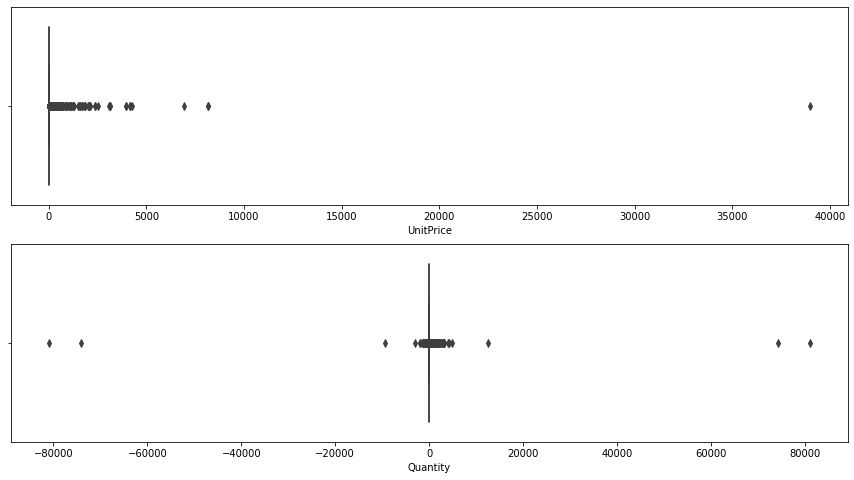

In [23]:
#Kiểm tra các thuộc tính numeric có outlier hay không
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(df['UnitPrice'])
plt.subplot(2,1,2)
sns.boxplot(df['Quantity'])
plt.show()

#### Nhận xét:
Sau khi trực quan hóa, ta thấy cột 'UnitPrice' có outliers khá nhiều. Tuy nhiên, đây là những outliers hợp lý vì có nhiều khách hàng mua sản phẩm với giá rất cao.

In [24]:
#Tìm số dòng có 'Quantity' có giá trị âm, tức là khách hàng không mua
cancellation_df = df[df['Quantity'] <= 0]
print('Số dòng có giá trị Quantity âm:', len(cancellation_df))
cancellation_df.head()

Số dòng có giá trị Quantity âm: 8872


InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-01-12 09:41:00      27.50       14527  United Kingdom  
154 2010-01-12 09:49:00       4.65       15311  United Kingdom  
235 2010-01-12 10:24:00       1.65       17548  United Kingdom  
236 2010-01-12 10:24:00       0.29       17548  United Kingdom  
237 2010-01-12 10:24:00       0.29       17548  United Kingdom

In [25]:
#Lọc ra top 10 sản phẩm bị trả lại (không bán được) nhiều nhất
cancellation_df.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity').head(10)

Quantity
Description                                  
PAPER CRAFT , LITTLE BIRDIE            -80995
MEDIUM CERAMIC TOP STORAGE JAR         -74494
ROTATING SILVER ANGELS T-LIGHT HLDR     -9367
Manual                                  -3995
FAIRY CAKE FLANNEL ASSORTED COLOUR      -3150
WHITE HANGING HEART T-LIGHT HOLDER      -2578
GIN + TONIC DIET METAL SIGN             -2030
HERB MARKER BASIL                       -1527
FELTCRAFT DOLL MOLLY                    -1447
TEA TIME PARTY BUNTING                  -1424

#### Nhận xét:
-Ta thấy các dòng có 'Quantity' bị âm, điều đó có nghĩa là ta không bán được hàng và khách hàng trả lại sản phẩm do sản phẩm bị khiếm khuyết hoặc không đạt chất lượng hoặc không phù hợp với nhu cầu cụ thể của từng khách hàng.  
-Trong các sản phẩm không bán được, ta có thể lọc ra top 10 sản phẩm với số liệu cụ thể như trên. Sau đó, dữ liệu này có thể cung cấp cho bộ phận sản xuất để họ kiểm tra lại khâu sản xuất, QA,QC của sản phẩm. Đồng thời, dữ liệu trên ta cũng có thể đưa cho bộ phận marketing để họ nghiên cứu đưa ra các bảng khảo sát để lấy thêm thông tin cụ thể từ nhiều khách hàng, từ đó sẽ biết được các tính năng thực sự cần thiết nào của các sản phẩm trên mà khách hàng mong muốn. Sau đó, những thông tin hữu ích này sẽ cung cấp cho bộ phận sản xuất để họ điều chỉnh, cải tiến các mẫu thiết kế của các sản phẩm này để có thể sản xuất và bán được các mặt hàng này trong tương lai.

### 3.2 Phân tích đa biến

### 3.2.1 Phân tích mối quan giữa các biến liên tục

In [26]:
#Loại bỏ ra các dòng có đơn hàng bị hủy
sold_df = df.loc[~df.index.isin(cancellation_df.index.tolist())].reset_index()
sold_df = sold_df.drop('index', axis=1)
sold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392732 entries, 0 to 392731
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


In [27]:
sold_df.tail()

InvoiceNo StockCode                      Description  Quantity  \
392727    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
392728    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
392729    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
392730    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
392731    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
392727 2011-09-12 12:50:00       0.85       12680  France  
392728 2011-09-12 12:50:00       2.10       12680  France  
392729 2011-09-12 12:50:00       4.15       12680  France  
392730 2011-09-12 12:50:00       4.15       12680  France  
392731 2011-09-12 12:50:00       4.95       12680  France

In [28]:
#Thêm cột mới tính doanh thu cho sản phẩm
sold_df['Sales'] = sold_df['Quantity'] * sold_df['UnitPrice']
sold_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  
0 2010-01-12 08:26:00       2.55       17850  United Kingdom  15.30  
1 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34  
2 2010-01-12 08:26:00       2.75       17850  United Kingdom  22.00  
3 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34  
4 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34

In [29]:
#Chuyển đổi kiểu dữ liệu cho cột 'InvoiceNo'
sold_df['InvoiceNo'] = sold_df['InvoiceNo'].astype('int64')
#Tạo thêm cột 'Date' và 'Month'
sold_df['Date'] = pd.DatetimeIndex(sold_df['InvoiceDate']).day
sold_df['Month'] = pd.DatetimeIndex(sold_df['InvoiceDate']).month

sold_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  Date  \
0 2010-01-12 08:26:00       2.55       17850  United Kingdom  15.30    12   
1 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34    12   
2 2010-01-12 08:26:00       2.75       17850  United Kingdom  22.00    12   
3 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34    12   
4 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34    12   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1

<AxesSubplot:xlabel='Date', ylabel='Sales'>

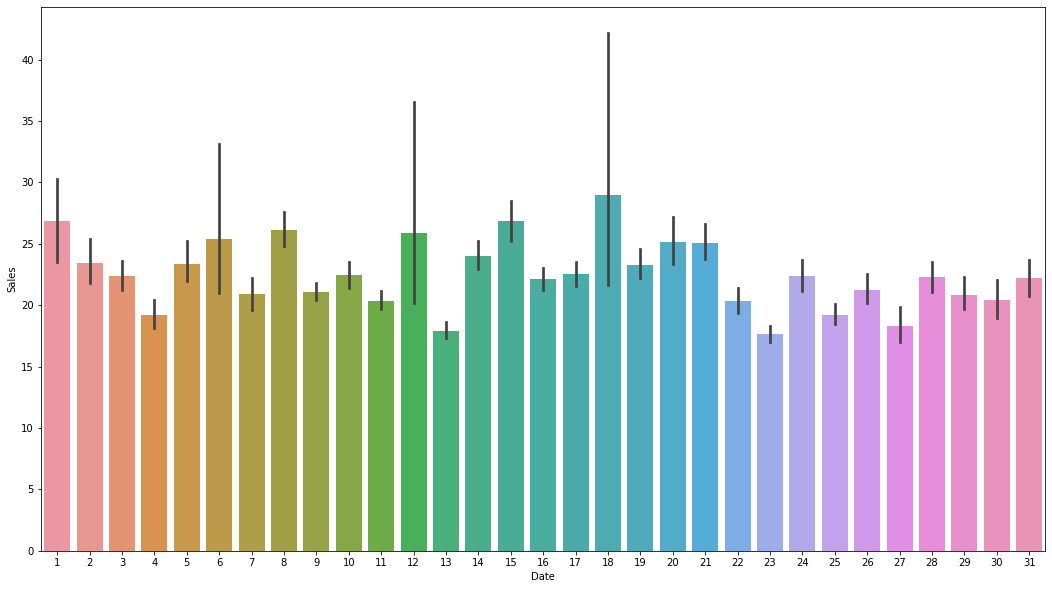

In [30]:
#Xem xét sự biến thiên của doanh số các ngày trong 1 tháng
plt.figure(figsize=(18,10))
sns.barplot(data=sold_df, x='Date', y='Sales')

#### Nhận xét:
- Vài ngày có doanh số bán tốt nhất là ngày 18, 12, 6.
- Vài ngày có doanh số bán thấp nhất là ngày 23, 13, 27.

<AxesSubplot:xlabel='Month', ylabel='Sales'>

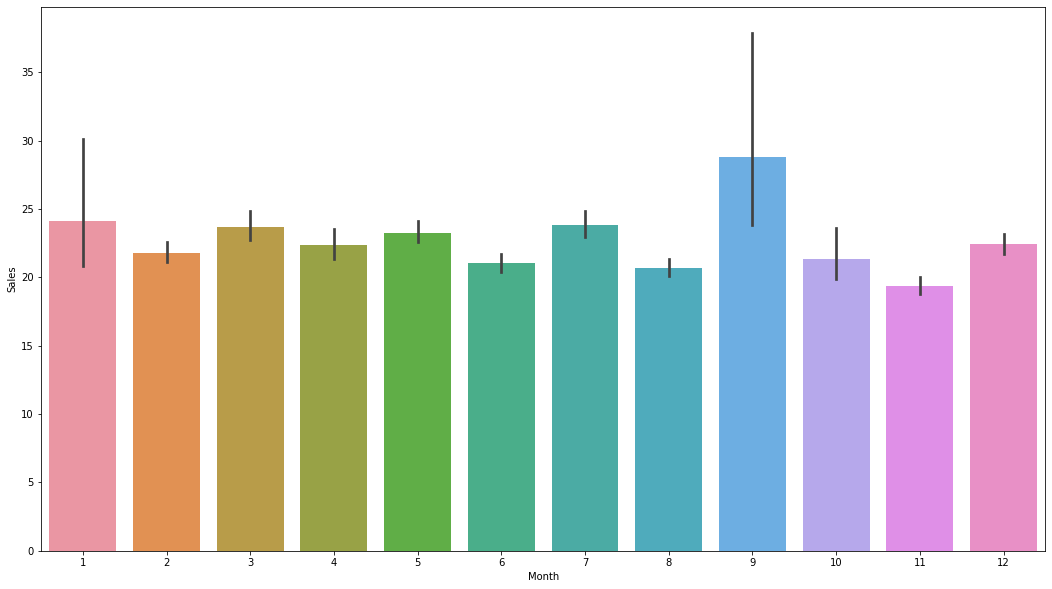

In [31]:
#Xem xét sự biến thiên của doanh số các tháng trong 1 năm
plt.figure(figsize=(18,10))
sns.barplot(data=sold_df, x='Month', y='Sales')

#### Nhận xét:
- Tháng có doanh số bán chạy nhất là tháng 9.
- Tháng có doanh số bán thấp nhất là tháng 11.

### 3.2.2 Phân tích mối quan giữa các biến phân loại


In [30]:
# Phân tích mối quan hệ giữa các cặp thuộc tính categorial
#Các thuộc tính 'InvoiceNo','StockCode' và 'Description' ta bỏ ra vì không có ý nghĩa để phân tích
cat_list = ['InvoiceDate', 'Date', 'Month', 'CustomerID', 'Country']
prob = 0.95
alpha = 1 - prob

for i in range(0, len(cat_list)-1):
    for j in range(i+1, len(cat_list)):
        
        two_way_table = pd.crosstab(sold_df[cat_list[i]], sold_df[cat_list[j]])        
        stat, p, dof, expected = chi2_contingency(two_way_table)        
        critical = chi2.ppf(prob, dof)
        
        if p <= alpha:
            print('Phân tích %s và %s:' %(cat_list[i], cat_list[j]))
            print('probability=%.3f, critical=%.3f, stat=%.3f, alpha=%.3f, p-value=%.3f' %(prob, critical, stat, alpha,p))
            print('%.3f <= %.3f -> Hai biến %s và %s phụ thuộc (Reject H0)' %(p, alpha, cat_list[i], cat_list[j]))
            

Phân tích InvoiceDate và Date:
probability=0.950, critical=520226.224, stat=11937720.000, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến InvoiceDate và Date phụ thuộc (Reject H0)
Phân tích InvoiceDate và Month:
probability=0.950, critical=191150.452, stat=4377164.000, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến InvoiceDate và Month phụ thuộc (Reject H0)
Phân tích InvoiceDate và CustomerID:
probability=0.950, critical=75002474.024, stat=1620671372.211, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến InvoiceDate và CustomerID phụ thuộc (Reject H0)
Phân tích InvoiceDate và Country:
probability=0.950, critical=624096.103, stat=13663421.743, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến InvoiceDate và Country phụ thuộc (Reject H0)
Phân tích Date và Month:
probability=0.950, critical=373.363, stat=139496.524, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến Date và Month phụ thuộc (Reject H0)
Phân tích Date và CustomerID:
probability=0.950, critical=130980

### 3.2.3 Phân tích mối quan giữa các biến phân loại và biến liên tục


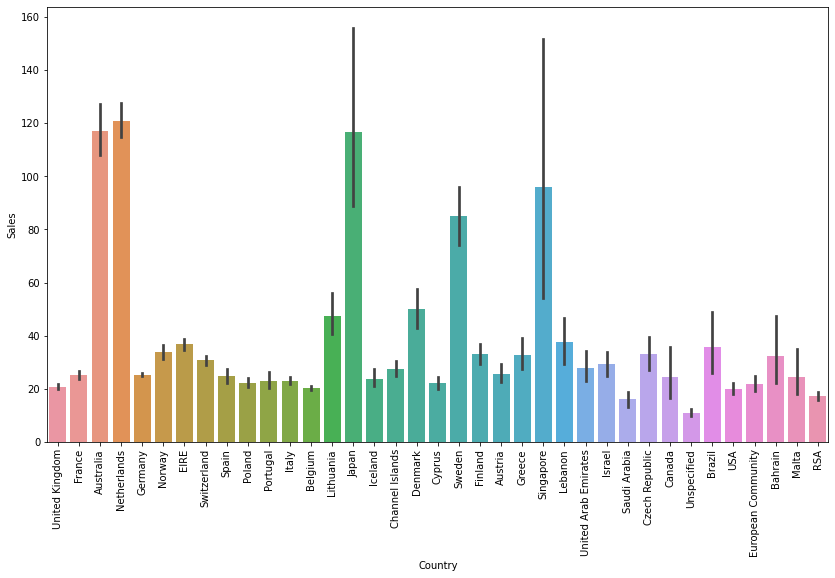

In [109]:
#Thuộc tính 'Country' có ảnh hưởng đến 'Sales' hay không
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(data=sold_df,
           x='Country', y='Sales', ax=ax)
plt.xticks(rotation=90)
plt.show()

#### Nhận xét:
- 3 đất nước có sức mua bình quân nhiều nhất là: Japan, Netherlands, Australia.
- 3 đất nước có sức mua bình quân ít nhất là: RSA, Saudi Arabia, Unspecified.

In [32]:
#Tìm top 5 nước cho doanh số cao nhất
sold_df.groupby('Country').agg({'Sales':'sum','Quantity':'sum'}).\
sort_values('Sales', ascending=False).head()

Sales  Quantity
Country                            
United Kingdom 7285024.64   4254037
Netherlands     285446.34    200937
EIRE            265262.46    140383
Germany         228678.40    119156
France          208934.31    111429

In [33]:
#Tìm top 5 nước cho doanh số thấp nhất
sold_df.groupby('Country').agg({'Quantity':'sum','Sales':'sum'}).\
sort_values('Sales', ascending=False).tail()

Quantity   Sales
Country                         
Brazil               356 1143.60
RSA                  352 1002.31
Czech Republic       671  826.74
Bahrain              260  548.40
Saudi Arabia          80  145.92

In [34]:
#Top 5 sản phẩm bán với số lượng nhiều nhất
sold_df.groupby('Description').agg({'Quantity':'sum','Sales':'sum'}).\
sort_values('Quantity', ascending=False).head()

Quantity     Sales
Description                                           
PAPER CRAFT , LITTLE BIRDIE            80995 168469.60
MEDIUM CERAMIC TOP STORAGE JAR         77916  81416.73
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54319  13558.41
JUMBO BAG RED RETROSPOT                46078  85040.54
WHITE HANGING HEART T-LIGHT HOLDER     36706 100392.10

In [35]:
#Top 5 sản phẩm cho doanh số cao nhất
sold_df.groupby('Description').agg({'Quantity':'sum','Sales':'sum'}).\
sort_values('Sales', ascending=False).head()

Quantity     Sales
Description                                           
PAPER CRAFT , LITTLE BIRDIE            80995 168469.60
REGENCY CAKESTAND 3 TIER               12384 142264.75
WHITE HANGING HEART T-LIGHT HOLDER     36706 100392.10
JUMBO BAG RED RETROSPOT                46078  85040.54
MEDIUM CERAMIC TOP STORAGE JAR         77916  81416.73

In [36]:
#Top 5 khách hàng cho doanh số cao nhất
sold_df.groupby('CustomerID').agg({'Quantity':'sum','Sales':'sum'}).\
sort_values('Sales', ascending=False).head()

Quantity     Sales
CustomerID                    
14646         197491 280206.02
18102          64124 259657.30
17450          69973 194390.79
16446          80997 168472.50
14911          80490 143711.17

In [37]:
#Top 5 khách hàng cho doanh số thấp nhất
sold_df.groupby('CustomerID').agg({'Quantity':'sum','Sales':'sum'}).\
sort_values('Sales', ascending=False).tail()

Quantity  Sales
CustomerID                 
17956              1  12.75
16454              3   6.90
14792              2   6.20
16738              3   3.75
13256          12540   0.00

## Bước 4: Xây dựng Models để phân cụm khách hàng


### 4.1 Sử dụng thuật toán RFM

In [38]:
sold_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  Date  \
0 2010-01-12 08:26:00       2.55       17850  United Kingdom  15.30    12   
1 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34    12   
2 2010-01-12 08:26:00       2.75       17850  United Kingdom  22.00    12   
3 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34    12   
4 2010-01-12 08:26:00       3.39       17850  United Kingdom  20.34    12   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1

In [40]:
#Tạo ra 3 thành phần: Recency, Frequency, Monetary

max_date = sold_df['InvoiceDate'].max().date()

Recency = lambda x: (max_date - x.max().date()).days
Frequency = lambda x: len(x.unique())
Monetary = lambda x: round(sum(x),2)

df_RFM = sold_df.groupby('CustomerID').agg({'InvoiceDate': Recency,
                                       'InvoiceNo': Frequency,
                                       'Sales': Monetary})

df_RFM.head()

InvoiceDate  InvoiceNo    Sales
CustomerID                                 
12346               326          1 77183.60
12347                40          7  4310.00
12348                76          4  1797.24
12349                19          1  1757.55
12350               311          1   334.40

In [41]:
#Rename the columns of DataFrame
df_RFM.columns = ['Recency','Frequency','Monetary']
#Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)
df_RFM.head()

Recency  Frequency  Monetary
CustomerID                              
14646             2         74 280206.02
18102            12         60 259657.30
17450             3         46 194390.79
16446            89          2 168472.50
14911             0        201 143711.17

In [42]:
df_RFM.shape

(4339, 3)

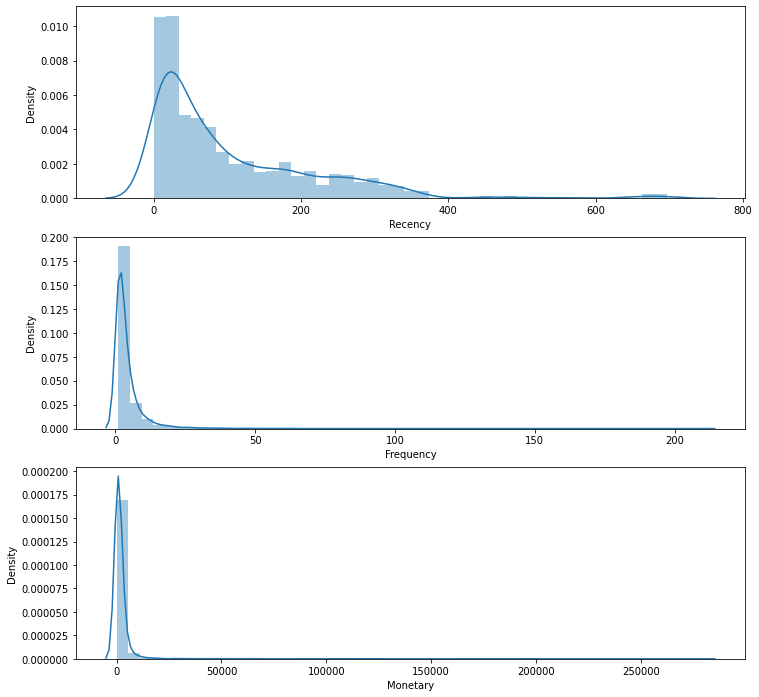

In [43]:
### Trực quan hóa 3 thành phần này
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.distplot(df_RFM['Recency'])
plt.subplot(3,1,2)
sns.distplot(df_RFM['Frequency'])
plt.subplot(3,1,3)
sns.distplot(df_RFM['Monetary'])
plt.show()

#### Nhận xét:
Ta thấy cả 3 thành phần Recency, Frequency và Monetary đều lệch phải.

In [44]:
## Calculate RFM quartiles
#Create labels for Recency, Frequency, Monetary
r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

In [45]:
[*r_labels]

[4, 3, 2, 1]

In [46]:
#Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'),q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'),q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'),q=4, labels=m_labels)


In [47]:
#Create new column R, F,M 
df_RFM = df_RFM.assign(R=r_groups.values, F=f_groups.values,M=m_groups.values)
df_RFM.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
14646             2         74 280206.02  4  4  4
18102            12         60 259657.30  4  4  4
17450             3         46 194390.79  4  4  4
16446            89          2 168472.50  2  2  4
14911             0        201 143711.17  4  4  4

In [48]:
#Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [49]:
df_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment
CustomerID                                                   
14646             2         74 280206.02  4  4  4         444
18102            12         60 259657.30  4  4  4         444
17450             3         46 194390.79  4  4  4         444
16446            89          2 168472.50  2  2  4         224
14911             0        201 143711.17  4  4  4         444

In [50]:
#Count num of unique segments
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

63


In [51]:
#Calculate RFM score and level
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
14646             2         74 280206.02  4  4  4         444      12.00
18102            12         60 259657.30  4  4  4         444      12.00
17450             3         46 194390.79  4  4  4         444      12.00
16446            89          2 168472.50  2  2  4         224       8.00
14911             0        201 143711.17  4  4  4         444      12.00

In [52]:
#Manual Segmentation
def rfm_level(df):
    if (df['R'] == 4 and df['F'] ==4 and df['M'] == 4)  :
        return 'STARS'
    
    elif (df['R'] == 4 and df['F'] ==1 and df['M'] == 1):
        return 'NEW'
    
    else:     
        if df['M'] == 4:
            return 'BIG SPENDER'
        
        elif df['F'] == 4:
            return 'LOYAL'
        
        elif df['R'] == 4:
            return 'ACTIVE'
        
        elif df['R'] == 1:
            return 'LOST'
        
        elif df['M'] == 1:
            return 'LIGHT'
        
        return 'REGULARS'

In [53]:
# Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)
df_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                 
14646             2         74 280206.02  4  4  4         444      12.00   
18102            12         60 259657.30  4  4  4         444      12.00   
17450             3         46 194390.79  4  4  4         444      12.00   
16446            89          2 168472.50  2  2  4         224       8.00   
14911             0        201 143711.17  4  4  4         444      12.00   

              RFM_Level  
CustomerID               
14646             STARS  
18102             STARS  
17450             STARS  
16446       BIG SPENDER  
14911             STARS

In [54]:
#Number of segments
df_RFM['RFM_Level'].value_counts()

REGULARS       1027
LOST           1024
BIG SPENDER     640
LIGHT           463
STARS           445
ACTIVE          420
LOYAL           281
NEW              39
Name: RFM_Level, dtype: int64

In [55]:
#Calculate mean values for each segment
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [56]:
rfm_agg

RFM_Level  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0       ACTIVE        12.00           3.00        697.00    420     9.68
1  BIG SPENDER        70.00           7.00       4673.00    640    14.75
2        LIGHT        77.00           1.00        186.00    463    10.67
3         LOST       272.00           1.00        384.00   1024    23.60
4        LOYAL        45.00           6.00       1146.00    281     6.48
5          NEW        15.00           1.00        225.00     39     0.90
6     REGULARS        74.00           2.00        727.00   1027    23.67
7        STARS        10.00          16.00       9094.00    445    10.26

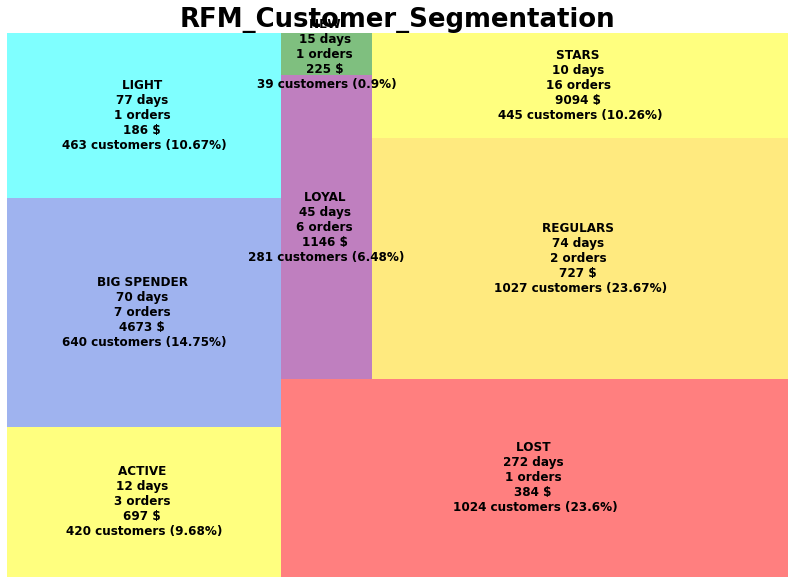

In [57]:
#Create treemap and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'LIGHT':'cyan',
               'LOST':'red', 'LOYAL':'purple', 'POTENTIAL':'green', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("RFM_Customer_Segmentation",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM_Customer_Segmentation.jpg')
plt.show()

In [58]:
#Scatter Plot (RFM)
fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

#### Nhận xét:
Nhìn vào 2 đồ thị và bảng kết quả, ta có những nhận xét sau:  
-Nhóm STARS là nhóm quan trọng nhất, chỉ có 445 khách hàng, chiếm chỉ khoảng 10.2% tổng số khách hàng, nhưng doanh số họ mang lại là rất lớn so với các nhóm còn lại. Các chỉ số đều là tốt nhất. Tần suất số ngày mua hàng của họ là nhỏ nhất và cực kỳ tốt, chỉ cách nhau trung bình 10 ngày. Đồng thời số lượng giao dịch của họ lại là nhiều nhất, bình quân là 16 giao dịch cho 1 đợt mua hàng, dẫn đến là doanh số bán hàng bình quân đạt được là rất tốt, khoảng 9094 đô cho 1 khách hàng.  
-Nhóm BIG SPENDER là nhóm khách hàng quan trọng thứ 2 vì doanh số của họ đem lại cũng rất lớn, chỉ sau nhóm STARS, chiếm tỉ trọng khoảng 14.7% tổng số khách hàng. Đối với nhóm này, ta có thể cải thiện đồng thời hai chỉ số Recency và Frequency. Chỉ cần hai chỉ số này tăng lên mỗi cái một ít, thì doanh số bán hàng sẽ tăng lên đáng kể.    
-Nhóm ACTIVE là nhóm khách hàng quan trọng thứ 3. Tỉ trọng của nhóm khách hàng này chiếm khoảng 9.6% trong tổng số khách hàng. Hiện tại, tần suất số ngày mua hàng của họ là rất tốt, chỉ là 12 ngày giữa 2 đợt mua hàng. Cho nên ta chỉ ưu tiên tập trụng cải thiện chỉ số giao dịch Frequency, khuyến khích họ mua nhiều hơn bằng các chiến lược kinh doanh kích cầu như khuyến mãi, voucher etc.  
-Nhóm REGULARS là nhóm khách hàng quan trọng thứ 4. Tỉ trọng của nhóm khách hàng này là 23.67%, chiếm cao nhất trong toàn bộ khách hàng. Vì vậy, ta phải quan tâm đến nhóm này. Hiện tại, chỉ số tần suất số ngày mua hàng chưa thật sự tốt, thời gian giữa 2 đợt mua hàng là 74 ngày. Vì vậy, ta nên xem xét cải thiện rút ngắn thời gian này xuống còn 60 ngày hoặc 45 ngày. Chỉ cần số ngày được rút ngắn xuống 1 ít, thì doanh số sẽ tăng lên rất nhiều nhờ vào số lượng khách hàng của nhóm này là cao nhất.  
-Nhóm LOYAL là nhóm khách hàng quan trọng thứ 5. Tỉ trọng của nhóm không cao, chỉ chiếm 6.4%, nhưng doanh số đem lại cũng khá tốt. Đối với nhóm này, ta chỉ cần tập trung cải thiện rút ngắn tần suất số ngày mua hàng xuống thí dụ là 30 ngày để gia tăng doanh số thêm.  
-Nhóm LIGHT là nhóm khách hàng xếp hạng thứ 6. Nhóm cũng có tỉ trọng vừa phải khoảng 10.6%. Đối với nhóm này, ta có thể xem xét cải thiện đồng thời 2 chỉ số Recency và Frequency, tức là rút ngắn tần suất số ngày mua hàng và số giao dịch trong 1 đợt mua hàng nhiều lên, để tăng thêm doanh số.  
-Nhóm LOST là nhóm khách hàng xếp hạng thứ 7. Nhóm này cũng chiếm tỉ trọng cao là 23.6%, chỉ đứng thứ 2 sau nhóm REGULARS trong toàn bộ khách hàng. Doanh số tổng thể cũng khá tốt. Tuy nhiên, đây là nhóm có tần suất số ngay mua hàng là lớn nhất, tức là lâu nhất. Thời gian trung bình giữa 2 đợt mua hàng là 272 ngày (gần 9 tháng) – thực sự là quá lâu. Vì vậy, điểm ta cần tập trung cải thiện là chỉ số Recency. Đối với riêng nhóm này, ta có thể có chính sách kinh doanh tiếp thị đặc biệt như siêu khuyến mãi để kích cầu cho họ. Chỉ cần số ngày rút ngắn từ 272 ngày xuống còn chẳng hạn 150 ngày, thì doanh số bán hàng sẽ tăng lên rất đáng kể.  
-Nhóm NEW là nhóm xếp hạng cuối cùng, chỉ có 39 khách hàng. Đây là nhóm chiếm tỉ trọng thấp, chỉ khoảng 0.9% trong tổng số khách hàng và doanh số mang lại cũng là thấp nhất. Vì vậy, ta không cần thiết phải cải thiện các chỉ số cho nhóm khách hàng này.  

#### Xây dựng 1 số hàm cần thiết trước khi sử dụng các thuật toán khác

In [59]:
#Định nghĩa hàm tính mean, count, percentage cho các thành phần
def mean_count_percent(curr_model):
    model_agg = curr_model.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']}).round(0)

    model_agg.columns = model_agg.columns.droplevel()
    model_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
    model_agg['Percent'] = round((model_agg['Count']/model_agg.Count.sum())*100, 2)

    # Reset the index
    model_agg = model_agg.reset_index()    
    model_agg['Cluster'] = 'Cluster '+ model_agg['Cluster'].astype('str')
    
    return model_agg

In [60]:
#Định nghĩa hàm vẽ treemap và lưu photo
def treemap_model(model_df, model_name):
    fig = plt.gcf()
    ax = fig.add_subplot()
    fig.set_size_inches(14, 10)

    colors_dict = {'Cluster 0':'yellow','Cluster 1':'royalblue', 'Cluster 2':'cyan',
                   'Cluster 3':'red', 'Cluster 4':'purple', 'Cluster 5':'green', 'Cluster 6':'gold'}

    squarify.plot(sizes=model_df['Count'],
                  text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
                  color=colors_dict.values(),
                  label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*model_df.iloc[i])
                          for i in range(0, len(model_df))], alpha=0.5 )

    title_name = model_name + '_Customer_Segmentation'
    plt.title(title_name,fontsize=26,fontweight="bold")
    plt.axis('off')

    #Save photo
    fig_name = title_name + '.jpg'
    plt.savefig(fig_name)
    plt.show()

In [61]:
#Định nghĩa hàm vẽ scatter Plot cho mô hình
def model_scatter(model_df):
    fig = px.scatter(model_df, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
               hover_name="Cluster", size_max=100)
    fig.show()

In [62]:
#Định nghĩa hàm vẽ 3D scatters
def model_scatter_3d(model_df):
    colors_dict = {'Cluster 0':'yellow','Cluster 1':'royalblue', 'Cluster 2':'cyan',
                   'Cluster 3':'red', 'Cluster 4':'purple', 'Cluster 5':'green', 'Cluster 6':'gold'}
    
    fig = px.scatter_3d(model_df, x='Recency', y='Frequency', z='Monetary',
                        color = 'Cluster', opacity=0.5,
                        color_discrete_map = colors_dict) #colors_dict2
    fig.update_traces(marker=dict(size=5),
                      selector=dict(mode='markers'))
    fig.show()

## 4.2 Sử dụng Kmeans clusters with Elbow Method

In [63]:
#Tạo dataframe cho 3 thành phần chủ đạo 'Recency', 'Frequency', 'Monetary'
df_now = df_RFM[['Recency','Frequency','Monetary']]
df_now.head()

Recency  Frequency  Monetary
CustomerID                              
14646             2         74 280206.02
18102            12         60 259657.30
17450             3         46 194390.79
16446            89          2 168472.50
14911             0        201 143711.17

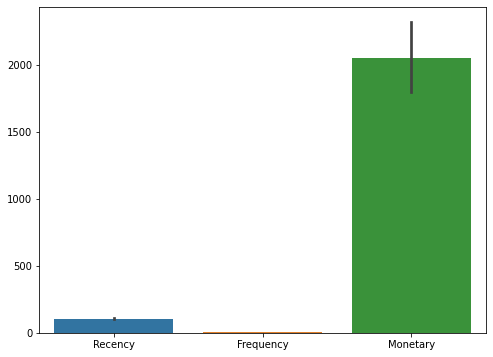

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_now[['Recency','Frequency','Monetary']])
plt.show()

#### Nhận xét:
Các thuộc tính có sự chênh lệch khá lớn về giá trị, cho nên ta sẽ thực hiện feature scaling lúc sau.

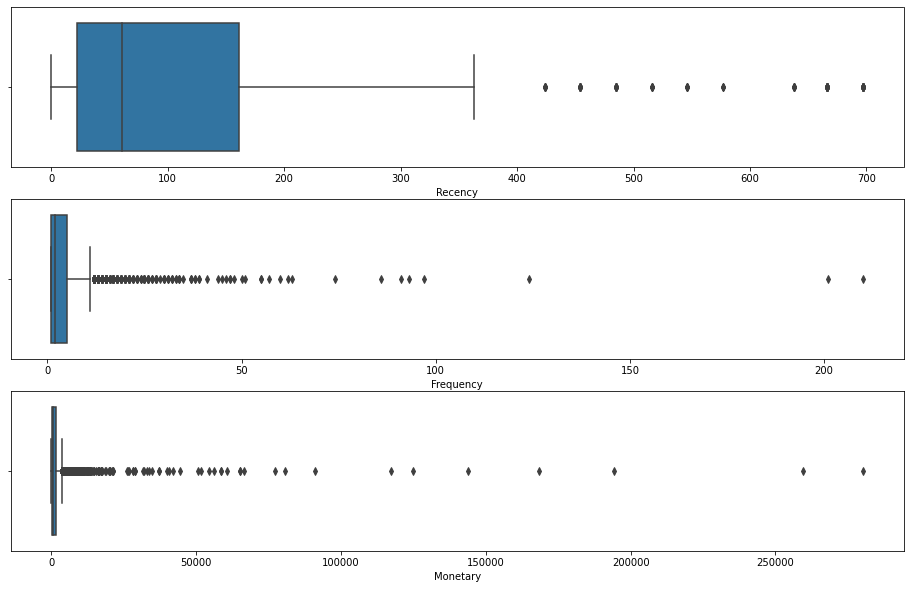

In [65]:
#Trực quan hóa 3 thành phần quan sát kiểm tra xem coi có outliers hay không
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
sns.boxplot(df_now['Recency'])
plt.subplot(3,1,2)
sns.boxplot(df_now['Frequency'])
plt.subplot(3,1,3)
sns.boxplot(df_now['Monetary'])
plt.show()

#### Nhận xét:
Đối với dữ liệu có outliers, ta có thể xem xét sử dụng RobustScaler. Tuy nhiên, đây là những outliers hợp lý, ta muốn bảo toàn duy trì outliers, cho nên ta sẽ sử dụng MinMaxScaler trong trường hợp này.

In [66]:
#Thực hiện feature scaling
scaler = MinMaxScaler()
scaler.fit(df_now)
scaler_array = scaler.transform(df_now)
scale_df = pd.DataFrame(scaler_array, columns=df_now.columns)
scale_df.head()

Recency  Frequency  Monetary
0     0.00       0.35      1.00
1     0.02       0.28      0.93
2     0.00       0.22      0.69
3     0.13       0.00      0.60
4     0.00       0.96      0.51

In [67]:
#Tính toán các giá trị k cho Kmeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scale_df)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid


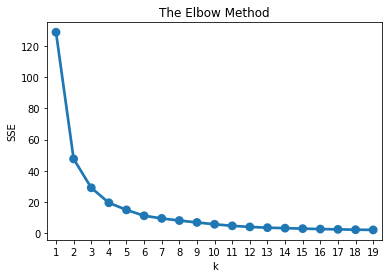

In [68]:
#Trực quan hóa để chọn k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

#### Nhận xét:
Ta chọn k = 5 vì từ giá trị 5 trở đi thì WSSE thay đổi là rất nhỏ.

In [69]:
# Build model with k=5
kmean_model = KMeans(n_clusters=5, random_state=42)
kmean_model.fit(scale_df)
kmean_model.labels_.shape

(4339,)

In [70]:
#Gán nhãn vào dữ liệu
df_kmean = df_now.copy()
df_kmean["Cluster"] = kmean_model.labels_
df_kmean.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        144.63      2.38   878.36   965
1         33.73      5.18  2121.04  2608
2        277.94      1.38   557.08   668
3        595.89      1.51   347.58    74
4         13.12     70.25 87919.19    24

In [71]:
#Tính các giá trị mean và percentage
df_kmean_agg = mean_count_percent(df_kmean)
df_kmean_agg

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0       145.00           2.00        878.00    965    22.24
1  Cluster 1        34.00           5.00       2121.00   2608    60.11
2  Cluster 2       278.00           1.00        557.00    668    15.40
3  Cluster 3       596.00           2.00        348.00     74     1.71
4  Cluster 4        13.00          70.00      87919.00     24     0.55

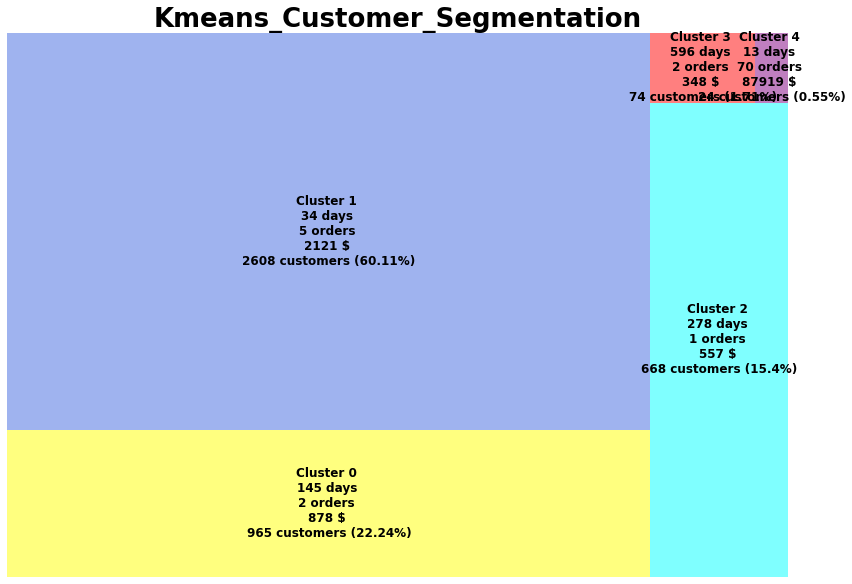

In [72]:
#Vẽ treemap
treemap_model(df_kmean_agg, 'Kmeans')

In [73]:
#Trực quan hóa scatter Plot
model_scatter(df_kmean_agg)

#### Nhận xét:
Nhìn vào 2 đồ thị và bảng kết quả trên, ta có những nhận xét sau:  
-Cluster 4 là nhóm khách hàng quan trọng nhất mặc dù số lượng chỉ có 24 khách hàng, chiếm chưa tới 1% tổng số khách hàng. Đây là khách hàng ta phải chăm sóc chu đáo vì doanh số họ mang lại rất lớn so với các nhóm còn lại. Tần suất số ngày mua hàng của họ là nhỏ nhất, điều đó có nghĩa là những lần mua của họ là rất gần nhau, chỉ cách nhau trung bình 13 ngày. Và mỗi lần mua hàng thì số lượng giao dịch của họ lại là nhiều nhất, trung bình lên đến 70 giao dịch, chứng tỏ họ mua rất nhiều. Và kết quả là doanh số bán hàng bình quân đạt được là 87919 đô cho 1 khách hàng.  
-Cluster 1 là nhóm khách hàng quan trọng thứ 2 ta phải lưu tâm, vì doanh số của họ đem lại cũng rất lớn, chỉ sau nhóm Cluster 4. Đây là nhóm chiếm tỉ trọng lớn nhất lên đến gần 60% tổng số khách hàng. Vì vậy, ta cần đưa ra các chiến lược kinh doanh kích cầu để nhóm này có thể mua nhiều hơn, thực hiện giao dịch nhiều hơn trong mỗi lần mua hàng. Hiện tại, số lần giao dịch của họ chỉ là 5. Cho nên, nếu từng khách hàng thực hiện giao dịch nhiều thêm 1 hoặc 2 giao dịch thì với số lượng khoảng 2608 khách hàng thì chắc chắn doanh số sẽ tăng lên rất nhiều. Ngoài ra hiện tại các khách hàng này mua hàng trung bình cách nhau 34 ngày. Vì vậy, ta có thể gia tăng doanh số bằng cách tìm các chiến lược tiếp thị giảm giá khuyến mãi để rút ngắn tần suất số ngày mua hàng của họ giảm xuống nhỏ hơn 34 ngày, tức là khuyến khích họ mua hàng thay vì 1 lần/1 tháng thì thành 2 lần/1 tháng chẳng hạn.  
-Cluster 0 là nhóm khách hàng quan trọng thứ 3. Tỉ trọng của nhóm khách hàng này chiếm khoảng 22% trong tổng số khách hàng. Đây là 1 tỉ trọng không nhỏ mà ta cũng cần phải lưu tâm. Hiện tại, tần suất số ngày mua hàng của họ là khá lớn, lên đến 145 ngày (gần 5 tháng) giữa 2 đợt mua hàng. Cho nên ta có ưu tiên cải thiện chỉ số này, tìm giải pháp giảm số ngày xuống còn 90 ngày chẳng hạn. Kế đó, ta cũng phải cải thiện chỉ số giao dịch Frequency, khuyến khích họ mua nhiều hơn.  
-Cluster 2 là nhóm khách hàng quan trọng thứ 4. Tỉ trọng của nhóm khách hàng này chiếm khoảng 15%, đứng thứ 3 trong tổng số khách hàng. Doanh số của nhóm này thì nhỏ hơn nhóm Cluster 0 ở trên. So với nhóm Cluster 0, ta để ý thấy nhóm này có thời gian giữa các lần mua hàng lâu hơn gần gấp đôi, và số giao dịch thì bằng 1 nửa và doanh số bình quân thì chỉ khoảng 2/3. Vì vậy, ta có thể đặt mục tiêu cải thiện các chỉ số nhóm này tiến tới chỉ số của nhóm Cluster 0.  
-Cluster 3 là nhóm khách hàng cuối cùng. Đây là nhóm chiếm tỉ trọng thấp, chỉ khoảng 1.7% trong tổng số khách hàng và doanh số mang lại cũng là thấp nhất. Các chỉ số đều gần như thấp nhất. Thời gian giữa các lần mua hàng của họ là hơn một năm rưỡi – một thời gian rất lâu. Vì vậy, ta không cần thiết phải cải thiện các chỉ số cho nhóm khách hàng này.  


## 4.3 Sử dụng thuật toán Agglomerative Clustering

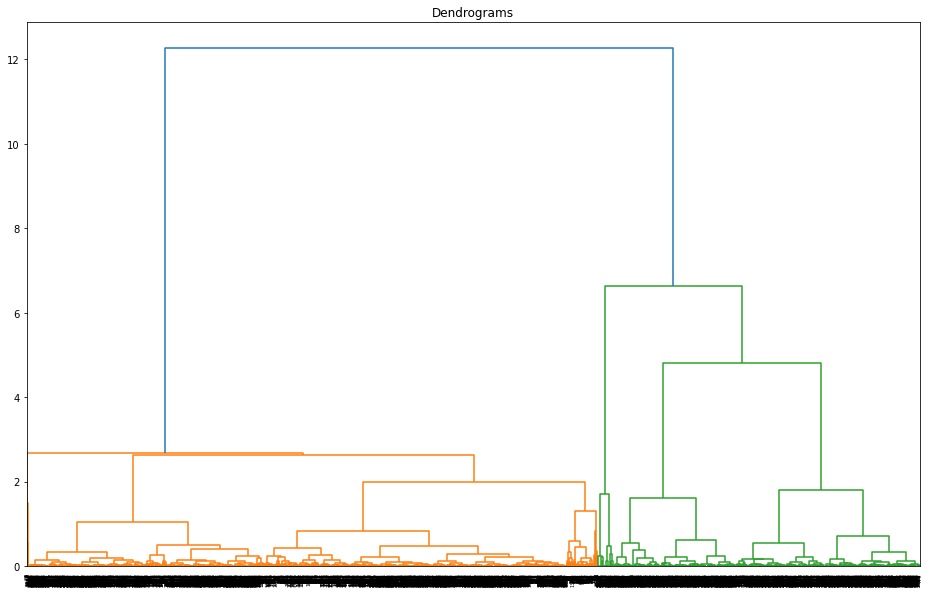

In [114]:
#Trực quan hóa dendrogram
plt.figure(figsize=(16,10))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(scale_df, method='ward'))
plt.show()

#### Nhận xét:
Dựa vào dendrogram, số cluster phù hợp để ta chọn là 2. Tuy nhiên, ta sẽ sử dụng thêm sihoutte score để xem xét bổ sung thêm rồi sẽ quyết định chọn số cụm.

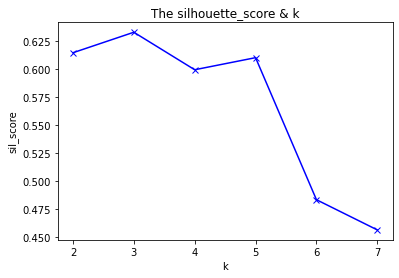


The optimal number of clusters (k) is: 3 with sihoutte_score is: 0.6332403351662109


In [74]:
#Tìm số cụm k
list_sil = []
K = range(2,8)
for k in K:
    test_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean')
    test_model.fit(scale_df)
    labels = test_model.fit_predict(scale_df)
    sil = metrics.silhouette_score(scale_df, labels, metric='euclidean')
    list_sil.append(sil)

#Trực quan hóa
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

vi_tri = list_sil.index(max(list_sil))
optimal_cluster = K[vi_tri]

print('\nThe optimal number of clusters (k) is:', optimal_cluster, 'with sihoutte_score is:', list_sil[vi_tri])

#### Nhận xét:
Dựa theo sihoutte score thì số cụm tối ưu là 3. Vì vậy, ta quyết định chọn số cụm cho thuật toán này là 3 cụm.

In [75]:
#Build model với k = 3
agg_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
agg_model.fit(scale_df)

AgglomerativeClustering(n_clusters=3)

In [76]:
#Gán nhãn vào dữ liệu
df_agg = df_now.copy()
df_agg['Cluster'] = agg_model.labels_

df_agg.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        208.12      1.87   681.78  1486
1         36.67      5.64  2829.71  2773
2        583.00      1.48   341.18    80

In [77]:
df_agg_mean = mean_count_percent(df_agg)
df_agg_mean

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0       208.00           2.00        682.00   1486    34.25
1  Cluster 1        37.00           6.00       2830.00   2773    63.91
2  Cluster 2       583.00           1.00        341.00     80     1.84

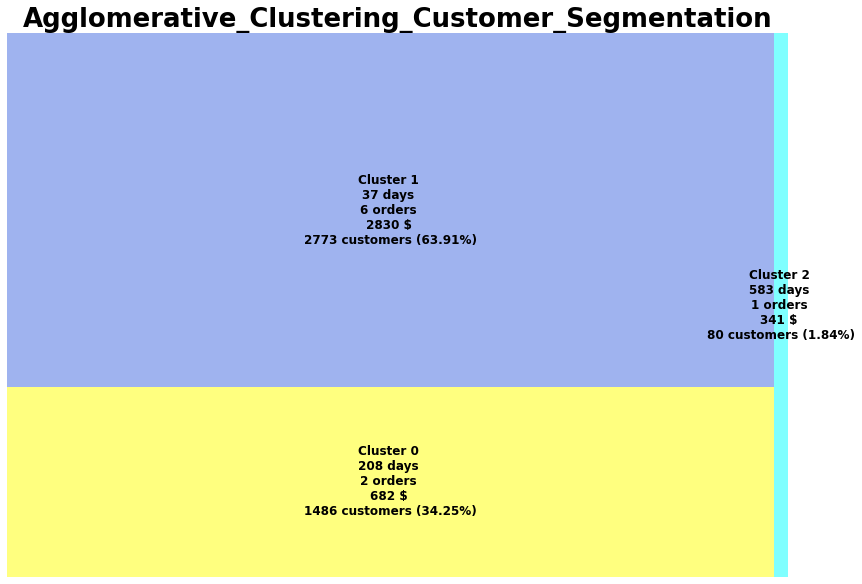

In [78]:
#Vẽ treemap
treemap_model(df_agg_mean, 'Agglomerative_Clustering')

In [79]:
model_scatter(df_agg_mean)

#### Nhận xét:
Nhìn vào 2 đồ thị và bảng kết quả, ta có những nhận xét sau:  
-Cluster 1 là nhóm khách hàng quan trọng nhất và chiếm tỉ trọng lớn nhất, tới gần 64% trong tổng số khách hàng. Thời gian giữa các lần mua hàng là 37 ngày tức hơn 1 tháng, đây cũng chưa thực sự là tốt mà ta có thể xem xét cải thiện thêm. Một điểm ta cần lưu ý thêm là với số lượng lớn khách hàng lên đến khoảng 2773, thì việc quản lý chăm sóc khách hàng sẽ không được thuận lợi và sẽ khó khăn hơn.  
-Cluster 0 là nhóm khách hàng quan trọng thứ 2, chỉ sau nhóm Cluster 1 và cũng chiếm tỉ trọng lớn khoảng 34.25%. So với nhóm Cluster 1, Cluster 0 có tần suất thời gian giữa các lần mua hàng lâu hơn gần gấp 5.5 lần (208 ngày). Chỉ số này của nhóm Cluster 0 thực sự là chưa tốt mà ta cần cải thiện.  
-Cluster 2 là nhóm xếp hạng cuối cùng. Đây là nhóm chiếm tỉ trọng rất thấp, chỉ khoảng 1.8% và có doanh số trung bình thấp nhất. Các chỉ số đều kém nhất. Vì vậy ta không cần thiết phải cải thiện nhóm này.  


## 4.4 Sử dụng thuật toán Spectral Clustering

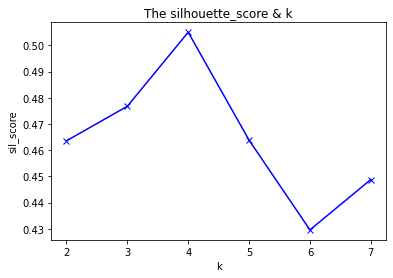


The optimal number of clusters (k) is: 4 with sihoutte_score is: 0.5049906011025468


In [80]:
#Tìm số cụm k
list_sil = []
K = range(2,8)
for k in K:
    test_model = SpectralClustering(n_components=k, random_state=42)
    test_model.fit(scale_df)
    labels = test_model.fit_predict(scale_df)
    sil = metrics.silhouette_score(scale_df, labels, metric='euclidean')
    list_sil.append(sil)

#Trực quan hóa
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

vi_tri = list_sil.index(max(list_sil))
optimal_cluster = K[vi_tri]

print('\nThe optimal number of clusters (k) is:', optimal_cluster, 'with sihoutte_score is:', list_sil[vi_tri])

In [81]:
#Build model, chọn k=4
spec_model = SpectralClustering(n_clusters=4, random_state=42)
spec_model.fit(scale_df)

SpectralClustering(n_clusters=4, random_state=42)

In [82]:
#Gán nhãn
df_spec = df_now.copy()
df_spec['Cluster'] = spec_model.labels_

df_spec.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0         38.74      5.18   2220.32  2838
1        655.63      1.71    373.73    49
2        219.15      1.82    690.18  1439
3         13.62     87.46 121112.10    13

In [83]:
df_spec_agg = mean_count_percent(df_spec)
df_spec_agg

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        39.00           5.00       2220.00   2838    65.41
1  Cluster 1       656.00           2.00        374.00     49     1.13
2  Cluster 2       219.00           2.00        690.00   1439    33.16
3  Cluster 3        14.00          87.00     121112.00     13     0.30

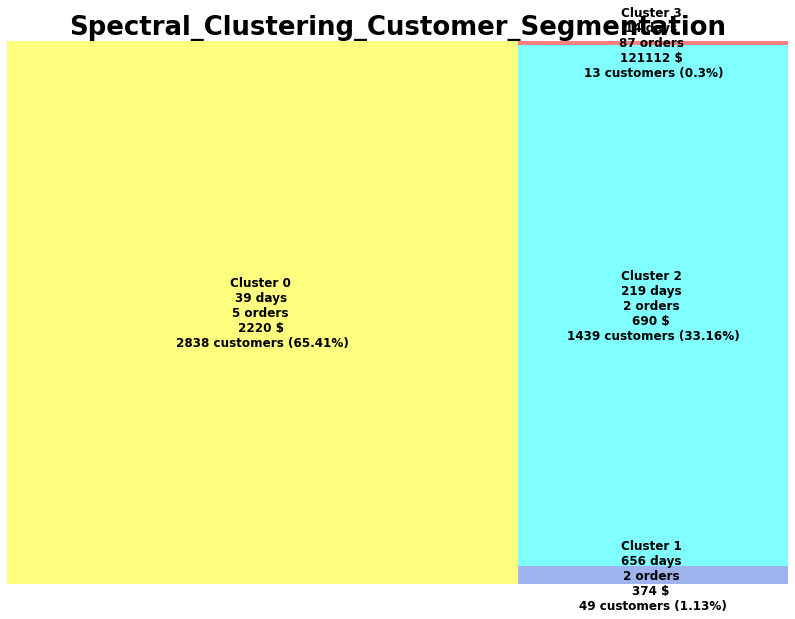

In [84]:
treemap_model(df_spec_agg, 'Spectral_Clustering')

In [85]:
#Vẽ scatter
model_scatter(df_spec_agg)

#### Nhận xét:
Nhìn vào 2 đồ thị và bảng kết quả, ta có những nhận xét sau:  
-Cluster 3 là nhóm quan trọng nhất, chỉ có 13 khách hàng, chiếm chỉ khoảng 0.3% tổng số khách hàng, nhưng doanh số họ mang lại là vô cùng lớn so với các nhóm còn lại. Các chỉ số đều là tốt nhất. Tần suất số ngày mua hàng của họ là nhỏ nhất, chỉ cách nhau trung bình 14 ngày. Đồng thời số lượng giao dịch của họ lại là nhiều nhất, bình quân lên đến 87 giao dịch, dẫn đến là doanh số bán hàng bình quân đạt được là cực kỳ cao, lên tới khoảng 121,112 đô cho 1 khách hàng.  
-Cluster 0 là nhóm khách hàng quan trọng thứ 2 vì doanh số của họ đem lại cũng rất lớn, chỉ sau nhóm Cluster 3. Đây là nhóm chiếm tỉ trọng lớn nhất lên đến gần 65% tổng số khách hàng. Đối với nhóm này, ta có thể cải thiện đồng thời hai chỉ số Recency và Frequency, tức là phải có chiến lược kinh doanh tiếp thị để thời gian mua hàng của nhóm này rút ngắn xuống và thực hiện giao dịch nhiều hơn trong mỗi lần mua hàng. Nếu hai chỉ số này được cải thiện, doanh số bán hàng sẽ tăng lên đáng kể vì số lượng khách hàng nhóm này là cao nhất.  
-Cluster 2 là nhóm khách hàng quan trọng thứ 3. Tỉ trọng của nhóm khách hàng này chiếm khoảng 33% trong tổng số khách hàng. Đây là 1 tỉ trọng không nhỏ mà ta cũng cần phải lưu tâm. Hiện tại, tần suất số ngày mua hàng của họ là khá lớn, lên đến 219 ngày (hơn 7 tháng) giữa 2 đợt mua hàng. Cho nên ta có ưu tiên cải thiện chỉ số này, tìm giải pháp giảm số ngày xuống còn 120 ngày, 90 ngày chẳng hạn. Kế đó, ta cũng phải cải thiện chỉ số giao dịch Frequency, khuyến khích họ mua nhiều hơn.  
-Cluster 1 là nhóm khách hàng cuối cùng, chỉ có 49 khách hàng. Đây là nhóm chiếm tỉ trọng thấp, chỉ khoảng 1.1% trong tổng số khách hàng và doanh số mang lại cũng là thấp nhất. Các chỉ số đều là kém nhất. Thời gian giữa các lần mua hàng của họ là 656 ngày, tức gần 22 tháng, đây là một thời gian rất lâu. Vì vậy, ta không cần thiết phải cải thiện các chỉ số cho nhóm khách hàng này.

## 4.5 Sử dụng thuật toán Gaussian Mixture Model (GMM)

In [86]:
#Chọn K components cho GMM
list_sil = []
K = range(2,8)
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scale_df)
    labels = gmm.predict(scale_df)
    sil = metrics.silhouette_score(scale_df, labels, metric='euclidean')
    list_sil.append(sil)


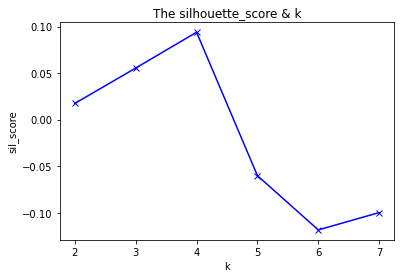

In [87]:
#Trực quan hóa để chọn K
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

#### Nhận xét:
Dựa vào đồ thị trên, ta chọn K = 4 vì giá trị sihouette là cao nhất.

In [88]:
#Chọn K = 4
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(scale_df)

GaussianMixture(n_components=4, random_state=42)

In [89]:
#Predict labels
gmm_labels = gmm.predict(scale_df)

In [90]:
#Gán nhãn
df_gmm = df_now.copy()
df_gmm['Cluster'] = gmm_labels

df_gmm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         22.38     31.04 30977.19   121
1        143.16      1.55   439.15  2459
2         34.77      5.39  1773.45  1385
3        146.22      9.35  4285.74   374

In [91]:
df_gmm_agg = mean_count_percent(df_gmm)
df_gmm_agg

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        22.00          31.00      30977.00    121     2.79
1  Cluster 1       143.00           2.00        439.00   2459    56.67
2  Cluster 2        35.00           5.00       1773.00   1385    31.92
3  Cluster 3       146.00           9.00       4286.00    374     8.62

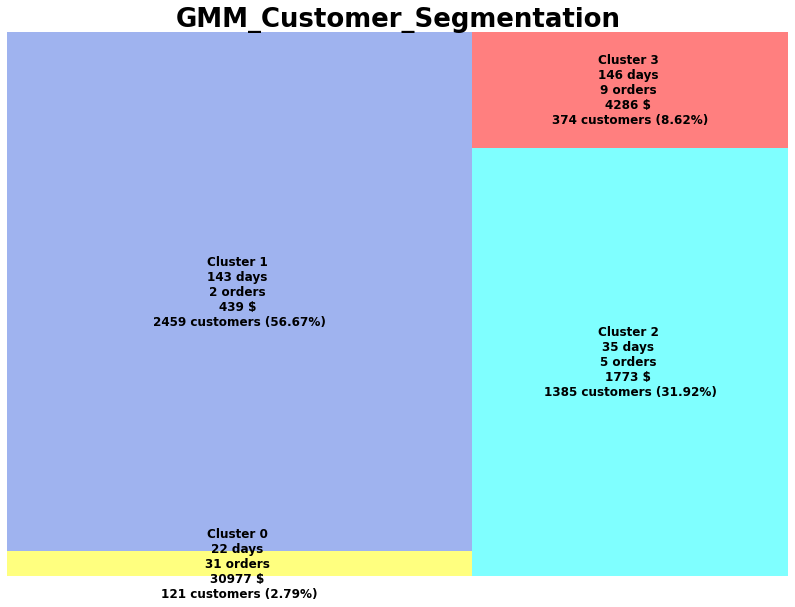

In [92]:
#Vẽ treemap
treemap_model(df_gmm_agg, 'GMM')

In [93]:
#Scatter Plot
model_scatter(df_gmm_agg)

#### Nhận xét:
Nhìn vào 2 đồ thị và bảng kết quả, ta có những nhận xét sau:  
-Cluster 0 là nhóm quan trọng nhất, chỉ có 121 khách hàng, chiếm chỉ khoảng 2.8% tổng số khách hàng, nhưng doanh số họ mang lại là rất lớn so với các nhóm còn lại. Các chỉ số đều là tốt nhất. Tần suất số ngày mua hàng của họ là nhỏ nhất, chỉ cách nhau trung bình 22 ngày. Đồng thời số lượng giao dịch của họ lại là nhiều nhất, bình quân lên đến 31 giao dịch, dẫn đến là doanh số bán hàng bình quân đạt được là rất tốt, khoảng 30,977 đô cho 1 khách hàng.  
-Cluster 2 là nhóm khách hàng quan trọng thứ 2 vì doanh số của họ đem lại cũng rất lớn, chỉ sau nhóm Cluster 0. Đây là nhóm chiếm tỉ trọng lớn, khoảng 31.9% tổng số khách hàng. Đối với nhóm này, ta có thể cải thiện đồng thời hai chỉ số Recency và Frequency. Cho dù hai chỉ số này có tăng lên ít, thì doanh số bán hàng sẽ tăng lên đáng kể vì số lượng khách hàng nhóm này là khá cao.    
-Cluster 3 và Cluster 1 lần lượt là nhóm khách hàng xếp hạng 3 và hạng 4. Tuy nhiên, một điều thú vị ta thấy ở đây là hai nhóm cluster này khá tương đồng và cluster 3 chỉ tốt hơn 1 chút so với cluster 1. Doanh số bình quân của Cluster 3 xấp xỉ 10 lần Cluster 1 nhưng số lượng khách hàng của Cluster 1 lại gấp 7 lần so với Cluster 3. Điều này cho thấy doanh số tổng thể của hai nhóm sẽ không chênh lệch nhiều. Vì Cluster 1 chiếm số lượng khách hàng nhiều nhất, lên đến 56.7% trong toàn bộ khách hàng, nên ta sẽ ưu tiên cải thiện chỉ số nhóm này hơn so với nhóm Cluster 3, đặc biệt là cải thiện chỉ số Frequency. Chỉ cần số lần giao dịch trong 1 đợt mua hàng tăng lên, doanh số của nhóm sẽ tăng lên đáng kể. Ngoài ra, đối với cả hai nhóm Cluster 1 và Cluster 3, ta cũng cần phải cải thiện rút ngắn thời gian mua hàng của hai nhóm từ hơn 140 ngày xuống còn 120 ngày, 90 ngày chẳng hạn.

## 4.6 Sử dụng thuật toán BIRCH

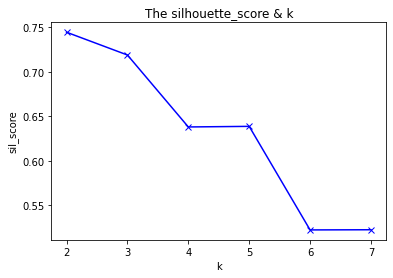


The optimal number of clusters (k) is: 2 with sihoutte_score is: 0.7445571604945438


In [94]:
#Tìm số cụm k cho Birch
list_sil = []
K = range(2,8)
for k in K:
    test_model = Birch(n_clusters=k, threshold=0.01)
    test_model.fit(scale_df)
    labels = test_model.fit_predict(scale_df)
    sil = metrics.silhouette_score(scale_df, labels, metric='euclidean')
    list_sil.append(sil)

#Trực quan hóa
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

vi_tri = list_sil.index(max(list_sil))
optimal_cluster = K[vi_tri]

print('\nThe optimal number of clusters (k) is:', optimal_cluster, 'with sihoutte_score is:', list_sil[vi_tri])

In [95]:
#Build model với k=2
birch_model = Birch(threshold=0.01, n_clusters=2)
birch_model.fit(scale_df)

Birch(n_clusters=2, threshold=0.01)

In [96]:
#Gán nhãn
df_birch = df_now.copy()
df_birch['Cluster'] = birch_model.labels_

df_birch.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         96.49      4.32  2080.28  4259
1        583.00      1.48   341.18    80

In [97]:
df_birch_agg = mean_count_percent(df_birch)
df_birch_agg

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        96.00           4.00       2080.00   4259    98.16
1  Cluster 1       583.00           1.00        341.00     80     1.84

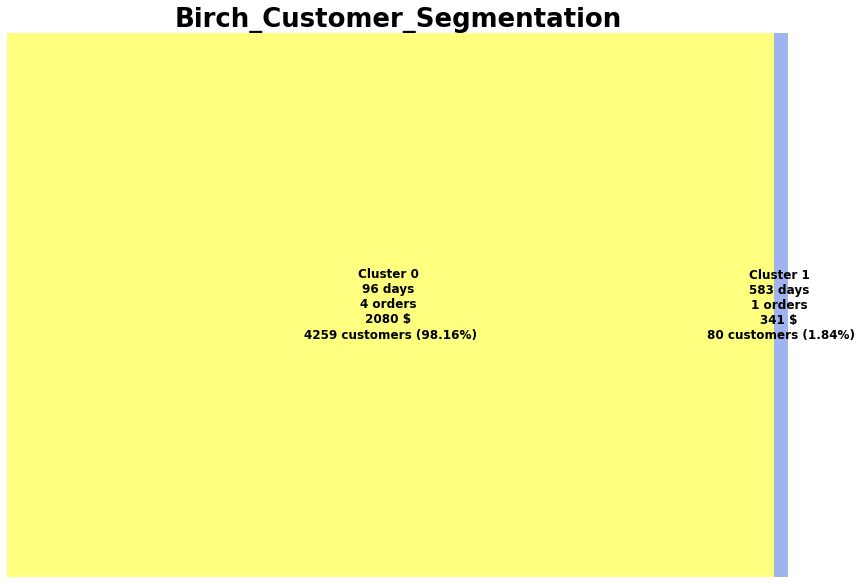

In [98]:
treemap_model(df_birch_agg, 'Birch')

In [99]:
model_scatter(df_birch_agg)

#### Nhận xét:
Nhìn vào 2 đồ thị và bảng kết quả, ta có những nhận xét sau:  
-Cluster 0 là nhóm khách hàng quan trọng nhất so với nhóm còn lại là Cluster 1, và chiếm tỉ trọng lớn nhất, tới gần 98% trong tổng số khách hàng. Tuy nhiên, ta thấy thời gian giữa các lần mua hàng của Cluster 0 là 96 ngày tức hơn 3 tháng, đây thực sự là không tốt mà ta cần phải cải thiện. Các chỉ số về Frequency và doanh số bình quân cũng còn khá thấp. Ngoài ra, một điểm ta cần lưu ý thêm là với số lượng rất lớn khách hàng lên đến khoảng 4259, thì việc quản lý chăm sóc khách hàng sẽ không được thuận lợi và sẽ khó khăn hơn nhiều.    
-Cluster 1 là nhóm còn lại và chiếm tỉ trọng rất thấp, chỉ khoảng 1.84% và có doanh số bình quân thấp nhất. Các chỉ số khác đều thấp nhất. Vì vậy ta không cần thiết phải cải thiện nhóm này.  
-Tổng thể, với thuật toán Birch trên với số cụm tối ưu là 2, ta thấy việc phân cụm chưa thực sự hợp lý do Cluster 0 chiếm tới 98% so với toàn bộ dữ liệu. Điều này cho thấy là việc phân cụm này không thực sự hữu ích vì trước và sau khi phân cụm hầu như không có sự khác biệt.

## 5. Tổng kết
- Trong các thuật toán ở trên, ta thấy thuật toán RFM, K-means và Spectral Clustering cho ra kết quả số cụm với số lượng trong từng cụm hợp lý hơn so với các thuật toán còn lại trong bài toán này. Nhất là phân loại được cụm có 'chất lượng cao', tức là cụm có số lượng khách hàng ít nhưng lại đóng góp vào doanh thu rất nhiều, chiếm phần lớn tổng doanh thu của toàn bộ khách hàng.
- Trong 3 thuật toán RFM, K-mean và Spectral Clustering, ta sẽ ưu tiên chọn thuật toán RFM trong trường hợp này vì thuật toán phân loại được các nhóm cụ thể hơn, hợp lý hơn so với 2 nhóm còn lại. Số lượng khách hàng trong từng nhóm cũng ở mức vừa phải, không quá nhiều và không quá ít, tạo thuận lợi trong việc quản lý khách hàng cho từng nhóm. Còn thuật toán K-means và Spectral Clustering thì sự chênh lệch số lượng khách hàng giữa các nhóm là rất đáng kể, trong đó có 1 nhóm luôn chiếm tỉ trọng hơn 50% tổng số khách hàng, dẫn đến việc quản lý và chăm sóc khách hàng cho nhóm này sẽ khó khăn hơn nhiều so với các nhóm còn lại.